# Prequisites

In [1]:
import cv2 
import os 
#from imutils import perspective
import numpy as np 
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils import perspective

# Detector Training

In [2]:
print("Number of Training images are", len(os.listdir("Total-Text")))

Number of Training images are 3


In [3]:
# Preparing Training Annotation Text file

count = 0
flag = 1
for i in tqdm(os.listdir("Total-Text/Train")):
  img_path = os.path.join("Total-Text/Train", i)
  bounding_box_path = os.path.join("Total-Text/Annotation/groundtruth_polygonal_annotation/Train", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  lis = []
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3] 
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]  
      dic["transcription"] = str(text)
      lis.append(dic)
    except:
      flag = 0
  lis = json.dumps(lis)
  if(flag == 0):
    flag = 1
    continue
  if(lis == [] or lis=="[]"):
    continue
  with open("train.txt", "a") as ob:
    ob.write(img_path.replace("Total-Text/Train\\","./")+"\t"+str(lis)+"\n")
  count = count + 1

print("Total number of Annotations created for Training are ", count)

100%|██████████| 50/50 [00:00<00:00, 1218.35it/s]

Total number of Annotations created for Training are  44


In [21]:
# Preparing Testing/Validation Annotation Text file

count = 0
flag = 1
for i in tqdm(os.listdir("Total-Text/Test")):
  img_path = os.path.join("Total-Text/Test", i)
  bounding_box_path = os.path.join("Total-Text/Annotation/groundtruth_polygonal_annotation/Test", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  lis = []
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3] 
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]  
      dic["transcription"] = str(text)
      lis.append(dic)
    except:
      flag = 0
  lis = json.dumps(lis)
  if(flag == 0):
    flag = 1
    continue
  if(lis == [] or lis=="[]"):

    continue
  with open("test.txt", "a") as ob:
    ob.write(img_path.replace("Total-Text/Test\\","./")+"\t"+str(lis)+"\n")
  count = count + 1

print("Total number of Annotations created for Test/Eval are ", count)

100%|██████████| 20/20 [00:00<00:00, 941.73it/s]

Total number of Annotations created for Test/Eval are  11


In [5]:
import os
os.getcwd()

'c:\\Users\\Bambang Hartono S\\Documents\\PaddleOCR'

In [6]:
# import wget
# wget.download("https://paddleocr.bj.bcebos.com/pretrained/MobileNetV3_large_x0_5_pretrained.pdparams", "c:\\Users\\Bambang Hartono S\\Documents\\PaddleOCR\\pretain_models" )

In [7]:
os.listdir("./pretrain_models/")

['en_PP-OCRv3_rec_train', 'MobileNetV3_large_x0_5_pretrained.pdparams']

In [48]:
#Multi-GPU Training
# !python3 -m paddle.distributed.launch --gpus '0,1'  tools/train.py -c configs/det/det_mv3_db.yml -o Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained

In [63]:
!python tools/train.py -c configs/det/det_mv3_db.yml  \
         -o Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained 

[2023/12/14 14:58:09] ppocr INFO: Architecture : 
[2023/12/14 14:58:09] ppocr INFO:     Backbone : 
[2023/12/14 14:58:09] ppocr INFO:         model_name : large
[2023/12/14 14:58:09] ppocr INFO:         name : MobileNetV3
[2023/12/14 14:58:09] ppocr INFO:         scale : 0.5
[2023/12/14 14:58:09] ppocr INFO:     Head : 
[2023/12/14 14:58:09] ppocr INFO:         k : 50
[2023/12/14 14:58:09] ppocr INFO:         name : DBHead
[2023/12/14 14:58:09] ppocr INFO:     Neck : 
[2023/12/14 14:58:09] ppocr INFO:         name : DBFPN
[2023/12/14 14:58:09] ppocr INFO:         out_channels : 256
[2023/12/14 14:58:09] ppocr INFO:     Transform : None
[2023/12/14 14:58:09] ppocr INFO:     algorithm : DB
[2023/12/14 14:58:09] ppocr INFO:     model_type : det
[2023/12/14 14:58:09] ppocr INFO: Eval : 
[2023/12/14 14:58:09] ppocr INFO:     dataset : 
[2023/12/14 14:58:09] ppocr INFO:         data_dir : ./Total-Text/Test/
[2023/12/14 14:58:09] ppocr INFO:         label_file_list : ['test.txt']
[2023/12/14 

# Recognizer Training

In [35]:
# Preparing the Training Annotation File and images

count = 0
flag = 1
img_counter = 0
for i in tqdm(os.listdir("Total-Text/Train")):
  img_path = os.path.join("Total-Text/Train", i)
  bounding_box_path = os.path.join("Total-Text/Annotation/groundtruth_polygonal_annotation/Train", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  lis = []
  
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3] 
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]  
      dic["transcription"] = str(text)
      lis.append(dic)
      x1,y1,x2,y2,x3,y3,x4,y4 = int(x1), int(y1), int(x2), int(y2), int(x3), int(y3), int(x4), int(x4)
      pts=np.asarray([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])
      img=cv2.imread(img_path)
      warped = perspective.four_point_transform(img, pts)
      new_img_path = "./crnn_train/img_"+str(img_counter)+".png"
      cv2.imwrite(new_img_path, warped)
      with open("rec_train.txt", "a") as ob:
        ob.write(new_img_path.replace("crnn_train",".")+"\t"+text+"\n")
      img_counter = img_counter + 1
    except:
      flag = 0
  if(flag == 0):
    flag = 1
    continue
  count = count + 1
print("Total number of Annotations created for Training are ", count)

100%|██████████| 50/50 [00:05<00:00,  9.59it/s]

Total number of Annotations created for Training are  50


In [36]:
os.getcwd()

'c:\\Users\\Bambang Hartono S\\Documents\\PaddleOCR'

In [37]:
# Preparing the Testing/Eval Annotation File and images
count = 0
flag = 1
img_counter = 0
for i in tqdm(os.listdir("Total-Text/Test")):
  img_path = os.path.join("Total-Text/Test", i)
  bounding_box_path = os.path.join("Total-Text/Annotation/groundtruth_polygonal_annotation/Test", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  lis=[]
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3] 
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]  
      dic["transcription"] = str(text)
      lis.append(dic)
      x1,y1,x2,y2,x3,y3,x4,y4 = int(x1), int(y1), int(x2), int(y2), int(x3), int(y3), int(x4), int(x4)
      pts = np.asarray([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])
      img = cv2.imread(img_path)
      warped = perspective.four_point_transform(img, pts)
      new_img_path = "./crnn_test/img_"+str(img_counter)+".png"
      cv2.imwrite(new_img_path, warped)
      with open("rec_test.txt", "a") as ob:
        ob.write(new_img_path.replace("crnn_test",".")+"\t"+text+"\n")
      img_counter = img_counter + 1
    except:
      flag = 0
  if(flag == 0):
    flag = 1
    continue
  count = count + 1
print("Total number of Annotations created for Test/Eval are ", count)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:01<00:00, 10.58it/s]

Total number of Annotations created for Test/Eval are  20


In [38]:
img_path

'Total-Text/Test\\img99.jpg'

In [147]:
import wget
wget.download("https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_train.tar", "c:\\Users\\Bambang Hartono S\\Documents\\PaddleOCR\\pretrain_models" )

'c:\\Users\\Bambang Hartono S\\Documents\\PaddleOCR\\pretrain_models/en_PP-OCRv4_rec_train.tar'

In [151]:
!python tools/train.py -c configs/rec/PP-OCRv4/en_PP-OCRv4_rec.yml -o Global.pretrained_model=./pretrain_models/en_PP-OCRv4_rec_train/best_accuracy

[2023/12/15 11:38:41] ppocr INFO: Architecture : 
[2023/12/15 11:38:41] ppocr INFO:     Backbone : 
[2023/12/15 11:38:41] ppocr INFO:         name : PPLCNetV3
[2023/12/15 11:38:41] ppocr INFO:         scale : 0.95
[2023/12/15 11:38:41] ppocr INFO:     Head : 
[2023/12/15 11:38:41] ppocr INFO:         head_list : 
[2023/12/15 11:38:41] ppocr INFO:             CTCHead : 
[2023/12/15 11:38:41] ppocr INFO:                 Head : 
[2023/12/15 11:38:41] ppocr INFO:                     fc_decay : 1e-05
[2023/12/15 11:38:41] ppocr INFO:                 Neck : 
[2023/12/15 11:38:41] ppocr INFO:                     depth : 2
[2023/12/15 11:38:41] ppocr INFO:                     dims : 120
[2023/12/15 11:38:41] ppocr INFO:                     hidden_dims : 120
[2023/12/15 11:38:41] ppocr INFO:                     kernel_size : [1, 3]
[2023/12/15 11:38:41] ppocr INFO:                     name : svtr
[2023/12/15 11:38:41] ppocr INFO:                     use_guide : True
[2023/12/15 11:38:41] ppocr 


eval model::  80%|████████  | 4/5 [00:18<00:04,  4.72s/it]


# Converting Trained Weights to Inference Weights

In [153]:
#Conversion of Recognizer Trained weights to Inference

!python tools/export_model.py -c configs/rec/PP-OCRv4/en_PP-OCRv4_rec.yml -o Global.pretrained_model=output/rec_ppocr_v4/best_accuracy  Global.save_inference_dir=./inference/en_PP-OCRv4_rec/

[2023/12/15 13:36:57] ppocr INFO: load pretrain successful from output/rec_ppocr_v4/best_accuracy
[2023/12/15 13:37:05] ppocr INFO: inference model is saved to ./inference/en_PP-OCRv4_rec/inference


I1215 13:37:04.636739 12356 interpretercore.cc:237] New Executor is Running.


In [47]:
#conversion of Detection Trained Weights to Inference

!python tools/export_model.py -c configs/det/det_mv3_db.yml -o Global.pretrained_model=./output/db_mv3/latest Global.save_inference_dir=/output/det_db_inference/

I1215 10:32:08.582579 23560 interpretercore.cc:237] New Executor is Running.


[2023/12/15 10:32:04] ppocr INFO: load pretrain successful from ./output/db_mv3/latest
[2023/12/15 10:32:09] ppocr INFO: inference model is saved to /output/det_db_inference/inference


# Inference using Custom Weights in PyPi Version

In [154]:
from paddleocr import PaddleOCR,draw_ocr
from PIL import Image

In [155]:
#Loading the detector and ocr with the previously trained weights
custom_ocr = PaddleOCR(use_angle_cls=True,
                rec_model_dir='PaddleOCR/inference/en_PP-OCRv4_rec',
                # det_model_dir='PaddleOCR/output/det_db_inference', 
                # rec_char_dict_path='ppocr/utils/dict/chinese_cht_dict.txt',
                use_gpu=False,
                show_log=False)

download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar to C:\Users\Bambang Hartono S/.paddleocr/whl\det\ch\ch_PP-OCRv4_det_infer\ch_PP-OCRv4_det_infer.tar


100%|██████████| 4.89M/4.89M [00:02<00:00, 2.20MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar to PaddleOCR/inference/en_PP-OCRv4_rec\ch_PP-OCRv4_rec_infer.tar


100%|██████████| 11.0M/11.0M [00:05<00:00, 2.04MiB/s]


In [156]:
ocr = PaddleOCR(use_angle_cls=True, lang="en")

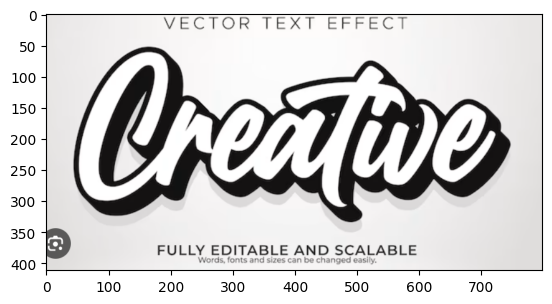

In [157]:
img_path = "img_test.png"
img = cv2.imread(img_path)
plt.imshow(img)

In [160]:
result = ocr.ocr(img)

In [161]:
result

[[[[[190.0, 5.0], [582.0, 5.0], [582.0, 28.0], [190.0, 28.0]],
   ('VECTORTEXTEFFECT', 0.996404230594635)],
  [[[181.0, 371.0], [595.0, 371.0], [595.0, 388.0], [181.0, 388.0]],
   ('FULLYEDITABLE ANDSCALABLE', 0.9769677519798279)],
  [[[243.0, 390.0], [533.0, 390.0], [533.0, 403.0], [243.0, 403.0]],
   ('Words, fonts and sizes can be changed easily.', 0.944884181022644)]]]

In [127]:
# draw result
image = Image.open(img_path).convert('RGB')
boxes = [line[0][0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./doc/fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

TypeError: '<' not supported between instances of 'tuple' and 'float'

In [128]:
boxes

[[[190.0, 5.0], [582.0, 5.0], [582.0, 28.0], [190.0, 28.0]]]